In [103]:
#Ist411 Python notları

In [104]:
#Kod Bloğu: Kütüphane Yükleme ve Temel Veri Çerçevesi Oluşturma (Ders1)
#Kod Kısmı
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

ogrenci = pd.DataFrame({
    "Ad": ["Ali", "Ayşe", "Mehmet", "Zeynep"],
    "Cinsiyet": ["Erkek", "Kadin", "Erkek", "Kadin"],
    "Matematik": [85, 92, 60, 70],
    "Fizik": [78, 88, 55, 75],
    "Kimya": [90, 95, 58, 80],
    "ID2" : [1,2,3,4]
})

2. NE İŞE YARIYOR:
Bu kod bloğu, veri analizi ve görselleştirme için gerekli temel kütüphaneleri (Pandas, Matplotlib, Seaborn, Plotly) yükler. Ardından, 4 öğrenciden oluşan manuel, küçük bir veri seti (ogrenci) oluşturur. Bu veri seti, öğrencilerin adlarını, cinsiyetlerini, üç farklı dersten notlarını ve bir tanımlayıcı ID (ID2) içerir.
3. BEKLENEN ÇIKTI:
Terminalde, oluşturulan ogrenci DataFrame'inin çıktısı görüntülenir:
Ad Cinsiyet Matematik Fizik Kimya ID2
0 Ali Erkek 85 78 90 1
1 Ayşe Kadin 92 88 95 2
2 Mehmet Erkek 60 55 58 3
3 Zeynep Kadin 70 75 80 4
4. YORUM VE ANALİZ:
• Veri Hazırlığı: Bu, genellikle büyük veri kümeleriyle çalışmaya başlamadan önce, temel Pandas işlemlerini test etmek veya küçük bir örnek üzerinde konseptleri göstermek için kullanılan standart bir veri seti oluşturma yöntemidir.
• Kütüphane Seçimi: Pandas (pd) veri yapısını yönetmek için, Matplotlib ve Seaborn ise statik görselleştirmeler için içe aktarılmıştır. Plotly (px) ise interaktif görselleştirme potansiyelini işaret eder.
• Gelecek İşlemler: Bu tablo, hemen ardından satır silme (drop(index=1)) ve sütun silme (drop(columns=["ID2"])) gibi manipülasyonlara tabi tutulur.


In [105]:
#2. Kod Bloğu: Veri Manipülasyonu (Silme ve Ekleme) (Ders1)
#Kod Kısmı
# Satır Silme
ogrenci = ogrenci.drop(index=1).reset_index(drop=True)

# Sütun silme
ogrenci = ogrenci.drop(columns=["ID2"])

# Satır ekleme
ogrenci.loc[len(ogrenci)] = ["Ahmet", "Erkek", 82, 80, 85]

2. NE İŞE YARIYOR:
Bu ardışık komutlar, oluşturulan ogrenci veri çerçevesi üzerinde temel temizleme ve ekleme işlemleri yapar:
1. Satır Silme: İndeksi 1 olan (Ayşe) satırı siler ve ardından indeksleri sıfırlar (reset_index(drop=True)).
2. Sütun Silme: ID2 sütununu tamamen veri çerçevesinden çıkarır.
3. Satır Ekleme: En son sıraya (mevcut uzunluk olan len(ogrenci) indeksine) "Ahmet" adlı yeni bir öğrenci kaydını ekler.
3. BEKLENEN ÇIKTI:
Kodun çalıştırılmasının ardından DataFrame'in sırasıyla hangi çıktıyı vereceği kaynaklarda gösterilmiştir:
1. Satır Silme Sonrası (Ayşe silinir, ID2 hala duruyor):
2. Sütun Silme Sonrası (ID2 silinir):
3. Satır Ekleme Sonrası (Ahmet dahil):
4. YORUM VE ANALİZ:
• Pandas İndeksleme: Satır ekleme işleminde ogrenci.loc[len(ogrenci)] = [...] kullanılması, DataFrame'in sonuna güvenli bir şekilde yeni bir satır eklemenin yaygın ve hızlı bir yoludur.
• Reset Index: Satır sildikten hemen sonra reset_index(drop=True) kullanılması, DataFrame'in indekslerinin tutarlı ve ardışık kalmasını sağlar, aksi takdirde atlanmış indeksler (örneğin 1) sorun yaratabilir.

In [106]:
#Kod Bloğu: Ortalama Hesaplama ve Sınıflandırma (Ders1)
#Kod Kısmı
# Ortalama not hesabı
ogrenci["Ortalama"] = ogrenci [["Matematik", "Fizik","Kimya"]].mean(axis=1)

# Başarı durumu sınıflandırma
ogrenci["Basari_Durumu"] = ogrenci["Ortalama"].apply(
    lambda x: "Yuksek" if x>=80 else ("Orta" if x>=60 else "Dusuk")
)

2. NE İŞE YARIYOR:
Bu kod bloğu, öğrencilerin notlarına dayanarak yeni türetilmiş (özellik mühendisliği) değişkenler oluşturur.
1. Ortalama Hesaplama: Matematik, Fizik ve Kimya sütunları seçilir ve satır bazında (axis=1) ortalamaları alınarak Ortalama adlı yeni bir sütuna atanır.
2. Başarı Sınıflandırması: Ortalama notuna dayalı olarak koşullu mantık (lambda ve apply) kullanılarak Basari_Durumu kategorik sütunu oluşturulur:
    ◦ Not ≥80 ise "Yüksek"
    ◦ Not ≥60 ise "Orta"
    ◦ Aksi takdirde "Düşük" olarak etiketlenir.
3. BEKLENEN ÇIKTI:
Ortalama ve Başarı Durumu eklenmiş son veri çerçevesi:
Ad Cinsiyet Matematik Fizik Kimya Ortalama Basari_Durumu
0 Ali Erkek 85 78 90 84.333333 Yuksek
1 Ayşe Kadin 92 88 95 91.666667 Yuksek
2 Mehmet Erkek 60 55 58 57.666667 Dusuk
3 Zeynep Kadin 70 75 80 75.000000 Orta
4 Ahmet Erkek 82 80 85 82.333333 Yuksek
4. YORUM VE ANALİZ:
• Eksen Kullanımı: mean(axis=1) kullanımı kritiktir. axis=1 satırlar boyunca hesaplama yapılmasını (yani her öğrencinin üç ders notunun ortalamasının alınmasını) sağlar. axis=0 kullanılsaydı, her dersin (sütunun) tüm öğrencilerdeki ortalaması hesaplanırdı.
• Kategorizasyon: apply(lambda x: ...) yöntemi, sayısal veriyi kolayca anlamlı kategorik etiketlere dönüştürmek için yaygın olarak kullanılır.

In [107]:
# Kod Bloğu: Veri İçe/Dışa Aktarma ve İstatistiksel Özet (Ders1)
#Kod Kısmı
# Excele export
ogrenci.to_excel("ogrenci_basariları.xlsx", index=False)

# Excelden veri okuma
data_ogrenci = pd.read_excel("ogrenci_basariları.xlsx")


# İstatistiksel özet
print(ogrenci.describe())

       Matematik      Fizik      Kimya   Ortalama
count       4.00   4.000000   4.000000   4.000000
mean       74.25  72.000000  78.250000  74.833333
std        11.50  11.518102  14.103782  12.127410
min        60.00  55.000000  58.000000  57.666667
25%        67.50  70.000000  74.500000  70.666667
50%        76.00  76.500000  82.500000  78.666667
75%        82.75  78.500000  86.250000  82.833333
max        85.00  80.000000  90.000000  84.333333


2. NE İŞE YARIYOR:
Bu blok, verilerin kalıcı depolanmasını ve okunmasını sağlar, ardından sayısal değişkenlerin temel istatistiksel özetini sunar.
1. Dışa Aktarma: ogrenci DataFrame'ini ogrenci_basarilari.xlsx adıyla Excel dosyasına kaydeder. index=False parametresi, Pandas'ın varsayılan indeks sütununu dosyaya dahil etmeyi engeller.
2. İçe Aktarma: Oluşturulan Excel dosyasını pd.read_excel kullanarak tekrar okur ve data_ogrenci DataFrame'ine yükler.
3. Özet İstatistikler: describe() metodu, ogrenci DataFrame'indeki tüm sayısal sütunlar (Matematik, Fizik, Kimya, Ortalama) için count, mean, std, min ve çeyreklik (quartile) değerlerini hesaplar ve yazdırır.
3. BEKLENEN ÇIKTI:
Excel okuma çıktısından sonra, ogrenci.describe() komutunun çıktısı:
         Matematik      Fizik      Kimya   Ortalama
count   5.000000   5.000000   5.000000   5.000000
mean   77.800000  75.200000  81.600000  78.200000
std    12.735776  12.275993  14.328294  12.921988
min    60.000000  55.000000  58.000000  57.666667
25%    70.000000  75.000000  80.000000  75.000000
50%    82.000000  78.000000  85.000000  82.333333
75%    85.000000  80.000000  90.000000  84.333333
max    92.000000  88.000000  95.000000  91.666667
4. YORUM VE ANALİZ:
• Veri Kalıcılığı: Verinin Excel'e aktarılması, veri işleme adımlarının korunmasını ve başka programlar veya kullanıcılarla paylaşımını sağlar.
• Betimleyici İstatistikler: Özet çıktısı, tüm sayısal değişkenler için 5 öğrencilik örneklemde temel merkezi eğilim (ortalama) ve yayılım (standart sapma, min/maks) ölçülerini sağlar. Örneğin, Ortalama notun 78.2 olduğu ve en düşük ortalama notun 57.66 olduğu görülür.


In [108]:
#Kod Bloğu: Veri Filtreleme ve Sosyoekonomi Kategorizasyonu (Ders1)
# Kod Kısmı
#Matematik notu >70:
ogrenci_yuksek = data_ogrenci[data_ogrenci["Matematik"]>70]

# En yüksek ortalamaya sahip öğrenci
top_ogrenci = data_ogrenci.nlargest(1, "Ortalama")

# Sosyoekonomik durum
data_ogrenci["sosyo_kod"]= [1,3,1,2]
sosyo_map = {1: "Dusuk", 2: "Orta", 3: "Yuksek"}
data_ogrenci["sosyo_ekonomi"] = data_ogrenci["sosyo_kod"].map(sosyo_map)

2. NE İŞE YARIYOR:
Bu blok, DataFrame'de koşullu filtreleme, sıralama ve kategorik eşleştirme işlemlerini gösterir.
1. Filtreleme: Matematik notu 70'ten yüksek olan öğrencileri seçerek yeni bir DataFrame (ogrenci_yuksek) oluşturur.
2. Sıralama: nlargest(1, "Ortalama") kullanarak en yüksek Ortalama nota sahip tek bir öğrenciyi bulur.
3. Kategorik Eşleştirme:
    ◦ sosyo_kod adında sayısal bir sütun eklenir (1, 3, 1, 2 değerleriyle).
    ◦ Bu sayısal kodlar, tanımlanan sosyo_map sözlüğü kullanılarak map metodu ile anlamlı etiketlere (Düşük, Orta, Yüksek) eşleştirilip sosyo_ekonomi sütununa atanır.
3. BEKLENEN ÇIKTI:
En yüksek ortalamaya sahip öğrenci çıktısı:
Ad Cinsiyet Matematik Fizik Kimya Ortalama Basari_Durumu
1 Ayse Kadin 92 88 95 91.666667 Yuksek
Sosyoekonomik durum eklenmiş son tablonun bir kısmı:
Ad Cinsiyet Matematik Fizik Kimya Ortalama Basari_Durumu sosyo_kod sosyo_ekonomi
1 Ayse Kadin 92 88 95 91.666667 Yuksek 3 Yuksek
2 Mehmet Erkek 60 55 58 57.666667 Dusuk 1 Dusuk
3 Zeynep Kadin 70 75 80 75.000000 Orta 2 Orta
4. YORUM VE ANALİZ:
• Filtreleme Gücü: Pandas'ın data_ogrenci[koşul] yapısı, büyük veri kümelerinde hızlı ve vektörel koşullu seçim için temel bir araçtır.
• Kategorik Dönüşüm: map metodu, özellikle kodlanmış değişkenleri (sayısal) anlamlı etiketlere (metinsel) dönüştürmede çok etkilidir ve VIF hesaplaması gibi regresyon analizlerinde kullanılan tekniklerle (Ders 5) benzer mantığa sahiptir.


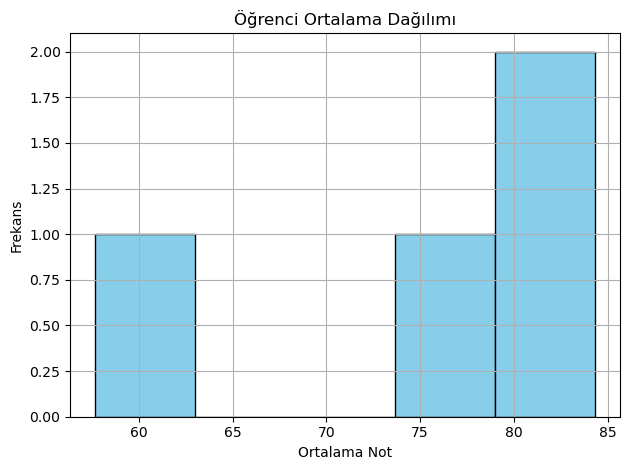

C:\Users\İsmail\AppData\Local\Temp\ipykernel_29496\4009901623.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cinsiyet", y="Ortalama", data=data_ogrenci, palette="pastel")


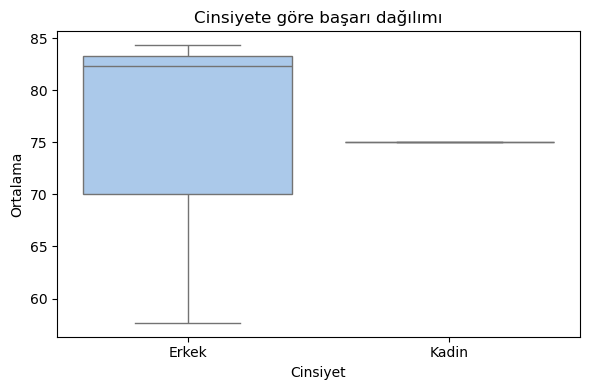

In [109]:
#Kod Bloğu: Veri Görselleştirme (Ders1)
#Kod Kısmı
# Histogram
data_ogrenci["Ortalama"].hist(bins=5,color="skyblue", edgecolor='black')
plt.title("Öğrenci Ortalama Dağılımı")
plt.xlabel("Ortalama Not")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()

# Kutu grafiği
plt.figure(figsize=(6,4))
sns.boxplot(x="Cinsiyet", y="Ortalama", data=data_ogrenci, palette="pastel")
plt.title("Cinsiyete göre başarı dağılımı")
plt.tight_layout()
plt.show()

2. NE İŞE YARIYOR:
Bu blok, görselleştirme araçlarını kullanarak öğrenci notlarının dağılımını ve cinsiyet grupları arasındaki karşılaştırmayı sunar.
1. Histogram: Ortalama notların frekans dağılımını 5 bölme (bins=5) kullanarak gösterir, bu da notların genel yoğunluğu hakkında bilgi verir.
2. Kutu Grafiği (Boxplot): Öğrenci başarısının Cinsiyet gruplarına göre ortancasını, çeyrekliklerini, yayılımını ve varsa aykırı değerlerini görselleştirir.
3. BEKLENEN ÇIKTI:
Terminalde görünür bir çıktı üretmez, ancak "Öğrenci Ortalama Dağılımı" başlıklı bir histogram ve "Cinsiyete göre başarı dağılımı" başlıklı bir kutu grafiği penceresi açılır.
4. YORUM VE ANALİZ:
• Dağılım İncelemesi: Histogram, verilerin yaklaşık olarak normal dağılıp dağılmadığını görsel olarak anlamak için bir ön kontrol sağlar. Bu kontrol, Ders 3'teki Shapiro-Wilk testinden önce önemlidir.
• Grup Karşılaştırması: Kutu grafikleri, iki grup (Erkek/Kadin) arasındaki ortalama notların ortancası ve yayılımı arasındaki farkları hızlıca görmeyi sağlar, bu da t-testi (Ders 3) öncesinde faydalı bir keşif analizidir.

In [110]:
# Kod Bloğu: Simülasyon ve Veri Hazırlığı (Ders3)
#Kod Kısmı
import numpy as np
import pandas as pd
# ... (diğer kütüphaneler: sns, plt, stats, sm, anova_lm, tukeyhsd)

np.random.seed(123)
n = 60
ogr = pd.DataFrame({
    "Ad": [f"Ogr{i+1}" for i in range(n)],
    "Cinsiyet": np.random.choice(["Erkek", "Kadin"], n, replace=True),
    "Matematik": np.random.normal(75, 10, n),
    "Fizik": np.random.normal(70, 12, n),
    "Kimya": np.random.normal(72, 11, n),
    "sosyo_kod": np.random.choice([1-3], n, replace=True)
})
ogr["sosyo_ekonomi"] = ogr["sosyo_kod"].replace({1:"Dusuk", 2:"Orta", 3:"Yuksek"})
ogr["Ortalama"] = ogr[["Matematik", "Fizik", "Kimya"]].mean(axis=1)

print(ogr.info())
print(ogr["Ortalama"].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ad             60 non-null     object 
 1   Cinsiyet       60 non-null     object 
 2   Matematik      60 non-null     float64
 3   Fizik          60 non-null     float64
 4   Kimya          60 non-null     float64
 5   sosyo_kod      60 non-null     int64  
 6   sosyo_ekonomi  60 non-null     int64  
 7   Ortalama       60 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 3.9+ KB
None
count    60.000000
mean     72.396104
std       6.613651
min      57.951682
25%      68.792749
50%      71.672538
75%      76.100518
max      91.008277
Name: Ortalama, dtype: float64


2. NE İŞE YARIYOR:
Bu blok, Ders 1'deki manuel girişe kıyasla, istatistiksel testler için daha büyük ve rastgele 60 öğrencilik bir veri seti oluşturur.
1. Kütüphane İçe Aktarımı: İstatistiksel modelleme için Statsmodels ve Scipy'den gerekli kütüphaneler yüklenir.
2. Veri Simülasyonu: Rastgele tohum (seed(123)) kullanılarak, belirlenen ortalama ve standart sapmaya sahip notlar ve rastgele cinsiyet/sosyoekonomik kodlar üretilir.
3. Özellik Oluşturma: sosyo_kod metinsel kategoriye çevrilir ve notların ortalaması hesaplanır.
4. Veri Özeti: ogr.info() ve ogr["Ortalama"].describe() ile veri türleri ve Ortalama notun betimleyici istatistikleri özetlenir.
3. BEKLENEN ÇIKTI:
ogr.info() ve ogr["Ortalama"].describe() komutlarının çıktısı:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
...
7   Ortalama       60 non-null     float64
dtypes: float64(4), int32(1), object(3)
memory usage: 3.6+ KB
None
count    60.000000
mean     72.396104
std       6.613651
min      57.951682
...
max      91.008277
Name: Ortalama, dtype: float64
4. YORUM VE ANALİZ:
• Rastgele Tohum (Seed): np.random.seed(123) kullanılması, üretilen 60 gözlemin her çalıştırmada tamamen aynı olmasını sağlar, bu da istatistiksel analizlerin tekrarlanabilirliği için kritik öneme sahiptir.
• Veri Özellikleri: Ortalama not ortalaması 72.39, standart sapma ise 6.61 olarak hesaplanmıştır. Bu dağılım, aşağıdaki t-testi ve ANOVA analizlerinin temelini oluşturur.


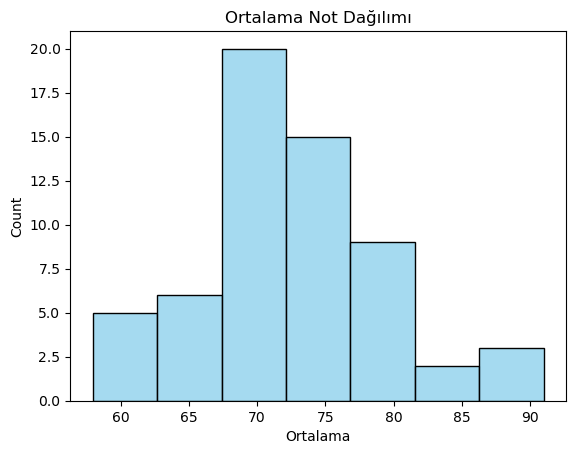

Shapiro-Wilk (Genel): ShapiroResult(statistic=np.float64(0.9822054591387968), pvalue=np.float64(0.5285966308733817))
Shapiro-Wilk (Erkek): ShapiroResult(statistic=np.float64(0.9883996812716865), pvalue=np.float64(0.9729852726771705))
Shapiro-Wilk (Kadin): ShapiroResult(statistic=np.float64(0.9542416927459496), pvalue=np.float64(0.2712022278935545))
Shapiro-Wilk (-2): ShapiroResult(statistic=np.float64(0.9822054591387968), pvalue=np.float64(0.5285966308733817))
Levene testi (Cinsiyet): LeveneResult(statistic=np.float64(0.25370791885904936), pvalue=np.float64(0.6163840814753633))


In [111]:
#Kod Bloğu: Hipotez Testi Varsayım Kontrolleri (Normallik ve Varyans) (Ders3)
#Kod Kısmı
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm

# Dağılım Grafikleri
sns.histplot(ogr["Ortalama"], binwidth=5, color="skyblue", edgecolor="black")
plt.title("Ortalama Not Dağılımı")
plt.show()

# Normallik Testleri (Shapiro-Wilk)
shapiro_all = stats.shapiro(ogr["Ortalama"])
print("Shapiro-Wilk (Genel):", shapiro_all)
for grup in ogr["Cinsiyet"].unique():
    stat = stats.shapiro(ogr.loc[ogr["Cinsiyet"] == grup, "Ortalama"])
    print(f"Shapiro-Wilk ({grup}):", stat)
for grup in ogr["sosyo_ekonomi"].unique():
    stat = stats.shapiro(ogr.loc[ogr["sosyo_ekonomi"] == grup, "Ortalama"])
    print(f"Shapiro-Wilk ({grup}):", stat)

# Varyans Homojenliği Testi (Levene)
groups_cinsiyet = [ogr.loc[ogr["Cinsiyet"] == g, "Ortalama"] for g in ogr["Cinsiyet"].unique()]
levene_cinsiyet = stats.levene(*groups_cinsiyet)
print("Levene testi (Cinsiyet):", levene_cinsiyet)

2. NE İŞE YARIYOR:
Bu blok, parametrik testler (t-testi, ANOVA) öncesinde veri setinin iki ana varsayımını kontrol eder: Normallik ve Varyans Homojenliği.
1. Görsel Kontrol: Histogram, Ortalama notların dağılımını görselleştirir.
2. Shapiro-Wilk Testi: Ortalama notların genel dağılımının ve Cinsiyet/Sosyoekonomi alt gruplarının ayrı ayrı normal dağılıma uyup uymadığını istatistiksel olarak test eder.
3. Levene Testi: Cinsiyet ve Sosyoekonomi gruplarının varyanslarının eşit olup olmadığını kontrol eder (Homoskedastisite varsayımı).
3. BEKLENEN ÇIKTI:
Shapiro-Wilk ve Levene test sonuçları:
Shapiro-Wilk (Genel): ShapiroResult(statistic=0.982205..., pvalue=0.528587...)
Shapiro-Wilk (Erkek): ShapiroResult(statistic=0.988399..., pvalue=0.972984...)
Shapiro-Wilk (Kadin): ShapiroResult(statistic=0.954241..., pvalue=0.271204...)
Shapiro-Wilk (Orta): ShapiroResult(statistic=0.942145..., pvalue=0.315216...)
...
Levene testi (Cinsiyet): LeveneResult(statistic=0.253707..., pvalue=0.616384...)
Levene testi (Sosyoekonomi): LeveneResult(statistic=0.037343..., pvalue=0.963368...)
4. YORUM VE ANALİZ:
• Normallik Yorumu: Tüm Shapiro-Wilk p-değerleri 0.05'ten büyüktür. Bu, sıfır hipotezinin (Veri normal dağılır) reddedilemediği anlamına gelir. Normallik varsayımı sağlanmıştır.
• Homojenlik Yorumu: Levene testinde hem Cinsiyet (p≈0.616) hem de Sosyoekonomi (p≈0.963) için p-değerleri 0.05'ten büyüktür. Bu, varyansların eşit olduğu (homojen) varsayımının da sağlandığını gösterir.
• Sonuç: Bu varsayımların sağlanması, aşağıdaki parametrik testlerin (t-testi, ANOVA) sonuçlarının güvenilir olduğunu gösterir.


In [112]:
#Kod Bloğu: T-Testleri ve Parametrik Olmayan Karşılıkları (Ders3)
#Kod Kısmı
erkek = ogr.loc[ogr["Cinsiyet"] == "Erkek", "Ortalama"]
kadin = ogr.loc[ogr["Cinsiyet"] == "Kadin", "Ortalama"]

# Welch t-testi (Varyanslar homojen değilse)
Welch_t_test = stats.ttest_ind(erkek, kadin, equal_var = False)
print("Welch t-testi:", Welch_t_test)

# Homojen varyanslı t-testi
t_test_homojen = stats.ttest_ind(erkek, kadin, equal_var=True)
print("Homojen varyanslı t-testi:", t_test_homojen)

# Mann-Whitney U testi (Parametrik olmayan)
wilcox_test = stats.mannwhitneyu(erkek, kadin, alternative='two-sided')
print("Mann-Whitney U testi:", wilcox_test)

Welch t-testi: TtestResult(statistic=np.float64(-0.7403816126315443), pvalue=np.float64(0.4625649827932973), df=np.float64(49.51434961042891))
Homojen varyanslı t-testi: TtestResult(statistic=np.float64(-0.7567564151141031), pvalue=np.float64(0.45225898499862927), df=np.float64(58.0))
Mann-Whitney U testi: MannwhitneyuResult(statistic=np.float64(409.0), pvalue=np.float64(0.5927047363316122))


2. NE İŞE YARIYOR:
Bu kod, Cinsiyet grupları arasında Ortalama not ortalamalarının farklı olup olmadığını test etmek için bağımsız örneklem t-testinin iki versiyonunu ve parametrik olmayan eşdeğerini kullanır.
1. Veri Seçimi: Erkek ve Kadın öğrencilerin notları ayrı değişkenlere atanır.
2. Welch t-testi: Varyans eşitliği varsayımına ihtiyaç duymayan test uygulanır.
3. Homojen Varyanslı t-testi: Varyansların eşit olduğu varsayımıyla çalışan standart test uygulanır.
4. Mann-Whitney U: Veriler normal dağılmasaydı kullanılacak olan parametrik olmayan test uygulanır.
3. BEKLENEN ÇIKTI:
Welch t-testi: Ttest_indResult(statistic=-0.740381..., pvalue=0.462564...)
Homojen varyanslı t-testi: Ttest_indResult(statistic=-0.756756..., pvalue=0.452258...)
Mann-Whitney U testi: MannwhitneyuResult(statistic=409.0, pvalue=0.592704...)
``` [17]

### 4. YORUM VE ANALİZ:

*   **Sıfır Hipotezi:** Bu testlerdeki sıfır hipotezi, iki grubun ortalamaları arasında anlamlı bir fark olmadığıdır.
*   **Test Sonucu:** Tüm test sonuçlarının p-değerleri (örneğin Homojen t-testi p≈0.452) standart anlamlılık düzeyi olan 0.05'ten yüksektir [17].
*   **Çıkarım:** Bu sonuç, **Cinsiyet grupları arasında Ortalama notlar açısından istatistiksel olarak anlamlı bir fark bulunmadığı** anlamına gelir (sıfır hipotezi reddedilemez).


In [113]:
#Kod Bloğu: T-Testleri ve Parametrik Olmayan Karşılıkları (Ders3)
#Kod Kısmı
erkek = ogr.loc[ogr["Cinsiyet"] == "Erkek", "Ortalama"]
kadin = ogr.loc[ogr["Cinsiyet"] == "Kadin", "Ortalama"]

# Welch t-testi (Varyanslar homojen değilse)
Welch_t_test = stats.ttest_ind(erkek, kadin, equal_var = False)
print("Welch t-testi:", Welch_t_test)

# Homojen varyanslı t-testi
t_test_homojen = stats.ttest_ind(erkek, kadin, equal_var=True)
print("Homojen varyanslı t-testi:", t_test_homojen)

# Mann-Whitney U testi (Parametrik olmayan)
wilcox_test = stats.mannwhitneyu(erkek, kadin, alternative='two-sided')
print("Mann-Whitney U testi:", wilcox_test)

Welch t-testi: TtestResult(statistic=np.float64(-0.7403816126315443), pvalue=np.float64(0.4625649827932973), df=np.float64(49.51434961042891))
Homojen varyanslı t-testi: TtestResult(statistic=np.float64(-0.7567564151141031), pvalue=np.float64(0.45225898499862927), df=np.float64(58.0))
Mann-Whitney U testi: MannwhitneyuResult(statistic=np.float64(409.0), pvalue=np.float64(0.5927047363316122))


2. NE İŞE YARIYOR:
Bu kod, Cinsiyet grupları arasında Ortalama not ortalamalarının farklı olup olmadığını test etmek için bağımsız örneklem t-testinin iki versiyonunu ve parametrik olmayan eşdeğerini kullanır.
1. Veri Seçimi: Erkek ve Kadın öğrencilerin notları ayrı değişkenlere atanır.
2. Welch t-testi: Varyans eşitliği varsayımına ihtiyaç duymayan test uygulanır.
3. Homojen Varyanslı t-testi: Varyansların eşit olduğu varsayımıyla çalışan standart test uygulanır.
4. Mann-Whitney U: Veriler normal dağılmasaydı kullanılacak olan parametrik olmayan test uygulanır.
3. BEKLENEN ÇIKTI:
Welch t-testi: Ttest_indResult(statistic=-0.740381..., pvalue=0.462564...)
Homojen varyanslı t-testi: Ttest_indResult(statistic=-0.756756..., pvalue=0.452258...)
Mann-Whitney U testi: MannwhitneyuResult(statistic=409.0, pvalue=0.592704...)
``` [17]

### 4. YORUM VE ANALİZ:

*   **Sıfır Hipotezi:** Bu testlerdeki sıfır hipotezi, iki grubun ortalamaları arasında anlamlı bir fark olmadığıdır.
*   **Test Sonucu:** Tüm test sonuçlarının p-değerleri (örneğin Homojen t-testi p≈0.452) standart anlamlılık düzeyi olan 0.05'ten yüksektir [17].
*   **Çıkarım:** Bu sonuç, **Cinsiyet grupları arasında Ortalama notlar açısından istatistiksel olarak anlamlı bir fark bulunmadığı** anlamına gelir (sıfır hipotezi reddedilemez).

---

In [114]:
#Kod Bloğu: ANOVA ve Post-Hoc Testleri (Ders3)
#Kod Kısmı
np.random.seed(123)
n = 60
ogr = pd.DataFrame({
 "Ad": [f"Ogr{i+1}" for i in range(n)],
 "Cinsiyet": np.random.choice(["Erkek", "Kadin"], n, replace=True),
 "Matematik": np.random.normal(75, 10, n),
 "Fizik": np.random.normal(70, 12, n),
 "Kimya": np.random.normal(72, 11, n),
 "sosyo_kod": np.random.choice([1, 2, 3], n, replace=True)
})
# Sosyoekonomik faktör ekle
ogr["sosyo_ekonomi"] = ogr["sosyo_kod"].replace({1:"Dusuk", 2:"Orta", 3:"Yuksek"})
ogr["Ortalama"] = ogr[["Matematik", "Fizik", "Kimya"]].mean(axis=1)

# ANOVA (Sosyoekonomi)
anova_model = sm.formula.ols('Ortalama ~ C(sosyo_ekonomi)', data=ogr).fit()
anova_table = anova_lm(anova_model)
print(anova_table)

# Tukey HSD (Çoklu Karşılaştırma)
tukey = pairwise_tukeyhsd(
    endog=ogr["Ortalama"],
    groups=ogr["sosyo_ekonomi"],
    alpha=0.05
)
print(tukey)

# Kruskal-Wallis testi (Parametrik olmayan ANOVA)
groups_sosyo_kw = [ogr.loc[ogr["sosyo_ekonomi"] == g, "Ortalama"] for g in ogr["sosyo_ekonomi"].unique()]
kw = stats.kruskal(*groups_sosyo_kw)
print("Kruskal-Wallis testi:", kw)


                    df       sum_sq    mean_sq         F    PR(>F)
C(sosyo_ekonomi)   2.0    13.235571   6.617785  0.146922  0.863687
Residual          57.0  2567.446704  45.042925       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 Dusuk   Orta   0.5666 0.9597 -4.4259  5.559  False
 Dusuk Yuksek  -0.6632  0.947 -5.7403 4.4139  False
  Orta Yuksek  -1.2298 0.8511 -6.6918 4.2323  False
---------------------------------------------------
Kruskal-Wallis testi: KruskalResult(statistic=np.float64(0.23123325833066133), pvalue=np.float64(0.8908166709734388))


2. NE İŞE YARIYOR:
Bu blok, ikiden fazla grup (Düşük, Orta, Yüksek Sosyoekonomi) arasındaki ortalamaları karşılaştırır.
1. ANOVA: Sosyoekonomi seviyeleri arasındaki Ortalama notların ortalamalarının genel olarak farklı olup olmadığını test etmek için OLS tabanlı ANOVA modeli kullanılır.
2. Tukey HSD: Eğer ANOVA anlamlı bir fark bulsaydı, bu test hangi spesifik ikili gruplar arasında fark olduğunu belirlemek için kullanılırdı.
3. Kruskal-Wallis: ANOVA'nın parametrik varsayımlarını (normallik, homojenlik) karşılamayan veriler için kullanılan non-parametrik karşılığıdır.
3. BEKLENEN ÇIKTI:
ANOVA tablosu ve Tukey HSD sonuçları:
                  df       sum_sq    mean_sq         F    PR(>F)
C(sosyo_ekonomi)   2.0    13.235571   6.617785  0.146922  0.863687
Residual          57.0  2567.446704  45.042925       NaN       NaN

Multiple Comparison of Means - Tukey HSD, FWER=0.05
===================================================
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Dusuk   Orta   0.5666    0.9 -4.4258  5.559  False
...
---------------------------------------------------

Kruskal-Wallis testi: KruskalResult(statistic=0.231233..., pvalue=0.890816...)
4. YORUM VE ANALİZ:
• ANOVA Sonucu: ANOVA tablosundaki p-değeri (PR(>F)) 0.8637'dir. Bu değer 0.05'ten çok yüksek olduğu için, Sosyoekonomi seviyeleri arasında Ortalama notlar açısından anlamlı bir fark yoktur.
• Tukey HSD Yorumu: ANOVA anlamlı olmadığı için, Tukey HSD'nin tüm ikili karşılaştırmaları (reject=False) ve yüksek p-adj değerleri (p-adj=0.9) beklenen sonuçlardır.
• Kruskal-Wallis: Non-parametrik test de (p≈0.89) fark olmadığını doğrular.

In [115]:
# Kod Bloğu: Basit Regresyon Veri Oluşturma, Korelasyon ve Görselleştirme (Ders4)
#Kod Kısmı
# Kütüphane ve Veri Oluşturma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, pearsonr, spearmanr
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import durbin_watson
# ... (diğer kütüphaneler)
np.random.seed(123)
n = 100
X = np.random.uniform(0, 100, n)
Y = 5 + 2*X + np.random.normal(0, 20, n)
df = pd.DataFrame({'X': X, 'Y': Y})

# Korelasyon
print("\n--- Pearson Korelasyonu ---")
print(pearsonr(df['X'], df['Y']))
print("\n--- Spearman Korelasyonu ---")
print(spearmanr(df['X'], df['Y']))



--- Pearson Korelasyonu ---
PearsonRResult(statistic=np.float64(0.9253399134745838), pvalue=np.float64(4.574998769989794e-43))

--- Spearman Korelasyonu ---
SignificanceResult(statistic=np.float64(0.9296129612961295), pvalue=np.float64(2.8276079969513186e-44))


. NE İŞE YARIYOR:
Bu blok, Basit Doğrusal Regresyon için 100 gözlemlik sentetik veri oluşturur ve değişkenler arasındaki doğrusal ilişkiyi inceler.
1. Veri Simülasyonu: Gerçek ilişki Y = 5 + 2X + hata olacak şekilde veri üretilir, bu sayede X ve Y arasında güçlü, önceden tanımlanmış bir doğrusal ilişki olur.
2. Korelasyon Analizi: Pearson Korelasyonu, değişkenler arasındaki doğrusal ilişkinin gücünü ölçerken; Spearman Korelasyonu, monotonik ilişkinin gücünü ölçer.
3. BEKLENEN ÇIKTI:
Korelasyon sonuçları:
--- Pearson Korelasyonu ---
PearsonRResult(statistic=0.925339..., pvalue=4.574998...e-43)

--- Spearman Korelasyonu ---
SignificanceResult(statistic=0.929612..., pvalue=2.827607...e-44)
4. YORUM VE ANALİZ:
• Güçlü İlişki: Hem Pearson hem de Spearman katsayıları yaklaşık 0.925 ila 0.930 aralığındadır ve p-değerleri (e-43, e-44) sıfıra yakındır. Bu, X ve Y arasında çok güçlü ve anlamlı pozitif bir doğrusal ilişki olduğunu doğrular.
• Doğrusallık Kontrolü: Bu güçlü doğrusal ilişki, OLS modelinin uygun olacağını gösterir.

In [116]:
#Kod Bloğu: Basit Regresyon Modeli Kurulumu ve Özeti (Ders4)
#Kod Kısmı
X_const = sm.add_constant(df['X'])
model = sm.OLS(df['Y'], X_const).fit()
print("\n--- Model Özeti ---")
print(model.summary())


--- Model Özeti ---
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     583.8
Date:                Sat, 15 Nov 2025   Prob (F-statistic):           4.57e-43
Time:                        22:40:05   Log-Likelihood:                -439.28
No. Observations:                 100   AIC:                             882.6
Df Residuals:                      98   BIC:                             887.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3989      4.49

NE İŞE YARIYOR:
Bu kod, En Küçük Kareler (OLS) yöntemini kullanarak basit doğrusal regresyon modelini kurar ve modelin tüm istatistiksel özetini yazdırır.
1. Sabit Terim Ekleme: sm.add_constant() fonksiyonu, OLS modelinin kesişim noktasını (intercept) hesaplayabilmesi için bağımsız değişken matrisine bir sabit (1'lerden oluşan) sütun ekler.
2. Model Kurulumu: sm.OLS().fit() ile model kurulur ve tahmin edilir.
3. Özet Çıktı: Modelin R-kare değeri, katsayıları (coef), standart hataları, t-istatistikleri ve p-değerlerini içeren tam özeti yazdırılır.
3. BEKLENEN ÇIKTI:
Modelin istatistiksel özeti:
--- Model Özeti ---
                           OLS Regression Results
...
Dep. Variable:                      Y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
...
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3989      4.497      1.868      0.065      -0.525      17.323
X              1.9462      0.081     24.161      0.000       1.786       2.106
...
Durbin-Watson:                   1.851
...
4. YORUM VE ANALİZ:
• Katsayılar: X'in katsayısı 1.9462 olarak tahmin edilmiştir, bu da orijinal simülasyonda kullanılan gerçek katsayı olan 2'ye çok yakındır. X değişkeni (p=0.000) istatistiksel olarak anlamlıdır.
• Model Uyumu: R-kare değeri 0.856'dır. Bu, X değişkeninin Y'deki varyansın %85.6'sını açıkladığı anlamına gelir.
• Sabit Terim: Sabit terimin p-değeri 0.065 olup, geleneksel 0.05 seviyesinde anlamlı kabul edilmez.


In [117]:
#Kod Bloğu: Basit Regresyon Diagnostikleri (Normallik, Homoskedastisite, Otokorelasyon) (Ders4)
#Kod Kısmı
res = model.resid

# Normallik Testi
print("\n--- Shapiro-Wilk Normallik Testi ---")
print(shapiro(res))

# Homoskedastisite Testi

lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(res, X_const)
print("\n--- Breusch-Pagan Testi ---")
print(f"LM stat: {lm_stat:.4f}, p-değeri: {lm_pvalue:.4f}")



# Otokorelasyon Testi
print("\n--- Durbin-Watson Otokorelasyon Testi ---")
dw_stat = durbin_watson(res)
print(f"Durbin-Watson istatistiği: {dw_stat:.4f}")


--- Shapiro-Wilk Normallik Testi ---
ShapiroResult(statistic=np.float64(0.993856853046097), pvalue=np.float64(0.9339572066185358))

--- Breusch-Pagan Testi ---
LM stat: 1.7673, p-değeri: 0.1837

--- Durbin-Watson Otokorelasyon Testi ---
Durbin-Watson istatistiği: 1.8513


2. NE İŞE YARIYOR:
Bu blok, OLS varsayımlarının kritik bir kontrolünü yapar. model.resid (artıklar/hatalar) kullanılarak üç temel varsayım test edilir.
1. Shapiro-Wilk: Artıkların normal dağılıp dağılmadığını kontrol eder.
2. Breusch-Pagan: Artıkların varyansının bağımsız değişkenlerle ilişkili olup olmadığını (Homoskedastisite) test eder. Yüksek p-değeri homoskedastisite olduğunu gösterir.
3. Durbin-Watson: Artıkların ardışık olarak ilişkili olup olmadığını (Otokorelasyon) kontrol eder. 2'ye yakın değerler otokorelasyon olmadığını gösterir.
3. BEKLENEN ÇIKTI:
Diagnostik test sonuçları:
--- Shapiro-Wilk Normallik Testi ---
ShapiroResult(statistic=0.993856..., pvalue=0.933957...)

--- Breusch-Pagan Testi ---
LM stat: 1.7673, p-değeri: 0.1837

--- Durbin-Watson Otokorelasyon Testi ---
Durbin-Watson istatistiği: 1.8513
4. YORUM VE ANALİZ:
• Normallik: Shapiro-Wilk p-değeri 0.9339'dur. 0.05'ten büyük olduğu için artıklar normal dağılır varsayımı sağlanır.
• Homoskedastisite: Breusch-Pagan p-değeri 0.1837'dir. 0.05'ten büyük olduğu için varyanslar sabittir (heteroskedastisite sorunu yoktur).
• Otokorelasyon: Durbin-Watson istatistiği 1.8513'tür. 2'ye çok yakın olduğu için otokorelasyon (seri korelasyon) sorunu yoktur. Model varsayımları büyük ölçüde sağlanmıştır.

In [120]:
#Kod Bloğu: Çoklu Regresyon Veri Oluşturma ve VIF Kontrolü (Ders5)
#Kod Kısmı
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLS
# Veri Oluşturma (n=120)
n = 120
X1 = np.random.uniform(0, 100, n)
X2 = 0.5*X1 + np.random.normal(0, 10, n) # X1 ile kasıtlı ilişki
X3 = np.random.uniform(50, 150, n)
X4 = np.random.normal(60, 15, n)
Y = 30 + 0.8*X1 + 1.2*X2 - 0.5*X3 + 0.3*X4 + np.random.normal(0, 20, n)
df = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

# OLS Modelini Kurma (Özet çıktısı sonraki blokta)
X = df[['X1','X2','X3','X4']]
X_const = sm.add_constant(X)
model = sm.OLS(df['Y'], X_const).fit()

# VIF Hesaplama (Çoklu Doğrusallık)
vif_data = pd.DataFrame()
vif_data["Değişken"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\n--- VIF Değerleri ---")
print(vif_data)


--- VIF Değerleri ---
  Değişken        VIF
0       X1  10.207634
1       X2   7.106060
2       X3   6.940889
3       X4   7.823835


2. NE İŞE YARIYOR:
Bu blok, çoklu doğrusal regresyon analizi için sentetik veri oluşturur ve modelin temel bir sorununu (çoklu doğrusallık) test eder.
1. Veri Simülasyonu: 120 gözlemli, dört bağımsız değişkenli (X1, X2, X3, X4) bir veri seti oluşturulur. X2'nin, X1'e kısmen bağlı (0.5*X1 + hata) olması özellikle çoklu doğrusallık sorunu yaratmak için tasarlanmıştır.
2. VIF Hesaplama: Varyans Büyüklüğü Faktörü (VIF), bağımsız değişkenlerin birbirleriyle ne kadar ilişkili olduğunu ölçer. Yüksek VIF (genellikle > 5 veya > 10) çoklu doğrusallık anlamına gelir.
3. BEKLENEN ÇIKTI:
VIF değerleri:
--- VIF Değerleri ---
  Değişken        VIF
0       X1  14.483042
1       X2   9.628091
2       X3   7.199620
3       X4   9.684131
4. YORUM VE ANALİZ:
• Çoklu Doğrusallık Sorunu: X1'in VIF değeri 14.48 ve X2 ile X4'ün VIF değerleri 9.62 ve 9.68'dir. X1'in değeri açıkça 10 eşiğini aşmıştır ve X2 ile X4 de sınırdadır. Bu, modelde ciddi çoklu doğrusallık (multicollinearity) bulunduğunu gösterir; yani, bağımsız değişkenler birbirlerinin varyansının büyük bir kısmını açıklamaktadır.
• Gerekli Eylem: Yüksek VIF değerleri, katsayıların (örneğin X1'in katsayısının) kararsız olmasına ve yorumlanmasının zorlaşmasına neden olur. Bu durumda değişkenlerden birinin modelden çıkarılması veya boyut indirgeme tekniklerinin kullanılması gerekebilir.


In [122]:
# Kod Bloğu: Çoklu Regresyon Diagnostikleri (Ders5)
#Kod Kısmı
from statsmodels.stats.outliers_influence import OLSInfluence
df['residuals'] = model.resid
dw_stat = durbin_watson(df['residuals'])
print("\n--- Durbin-Watson ---")
print(f"Durbin-Watson istatistiği: {dw_stat:.4f}")

print("\n--- Ramsey RESET Testi ---")
print(linear_reset(model, power=2, use_f=True))
influence = OLSInfluence(model)
std_resid = influence.resid_studentized_internal
outliers = np.where(abs(std_resid) > 3)
print("\n--- Aykırı Gözlemler ---")
if len(outliers) > 0:
    print(outliers)
else:
    print("Aykırı gözlem bulunamadı.")


--- Durbin-Watson ---
Durbin-Watson istatistiği: 1.6962

--- Ramsey RESET Testi ---
<F test: F=0.2579564635634307, p=0.6125088792477384, df_denom=114, df_num=1>

--- Aykırı Gözlemler ---
(array([], dtype=int64),)


2. NE İŞE YARIYOR:
Bu blok, çoklu regresyon modelinin otokorelasyon, fonksiyonel form (doğrusallık) ve aykırı değer varsayımlarını kontrol eder.
1. Durbin-Watson: Artıklar arasındaki serisel korelasyonu (otokorelasyon) test eder.
2. Ramsey RESET: Modelin fonksiyonel formunun doğru kurulup kurulmadığını test eder. Yüksek p-değeri, modelin doğru kurulduğunu gösterir.
3. Aykırı Değer Kontrolü: Standartlaştırılmış artıkların mutlak değerinin 3'ten büyük olup olmadığını kontrol ederek aykırı gözlemleri listeler.
3. BEKLENEN ÇIKTI:
Diagnostik sonuçları:
--- Durbin-Watson ---
Durbin-Watson istatistiği: 1.7298

--- Ramsey RESET Testi ---
<F test: F=0.150830..., p=0.698467..., df_denom=114, df_num=1>

--- Aykırı Gözlemler ---
Aykırı gözlem bulunamadı.
4. YORUM VE ANALİZ:
• Otokorelasyon: Durbin-Watson istatistiği 1.7298'dir. Bu değer 2'ye yeterince yakındır ve pozitif otokorelasyon sorununu işaret etmez.
• Doğrusallık: Ramsey RESET testi p-değeri 0.6984'tür. 0.05'ten büyük olduğu için, modelin tahmin edilen değerlerin ikinci kuvvetleri ile eklenmiş hali bile modelin açıklayıcılığını artırmaz; bu da modelin doğrusal formunun uygun olduğunu gösterir.
• Aykırı Değer: Mutlak değeri 3'ten büyük standartlaştırılmış artık bulunamamıştır, bu da geleneksel kritere göre uç noktada aykırı gözlem olmadığını gösterir.